In [7]:
import trimesh
import open3d as o3d
import numpy as np

# 1. Load the OFF mesh
mesh = trimesh.load_mesh("cup_0003.off")

# 2. Sample points uniformly on the mesh surface
points, _ = trimesh.sample.sample_surface(mesh, 1000)  # adjust number of points

# 3. Convert to Open3D point cloud
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# 5. Save as PLY
o3d.io.write_point_cloud("cup_0003_1000.ply", pcd)
print("Saved as output.ply")



Saved as output.ply


# .stl to .ply conversion

In [ ]:
import open3d as o3d

# Input and output file paths
input_file = r"resources\3D_object\stl\sphere_op.stl"   # replace with your STL file path
output_file = r"resources\3D_object\ply\sphere_op.ply"  # desired output PLY file path

# Load the STL mesh
mesh = o3d.io.read_triangle_mesh(input_file)

# Check if the mesh is loaded properly
if not mesh.is_empty():
    print("STL file loaded successfully!")
    
    # Save as PLY
    o3d.io.write_triangle_mesh(output_file, mesh)
    print(f"Converted and saved as {output_file}")
else:
    print("Failed to load the STL file.")


STL file loaded successfully!
Converted and saved as resources\3D_object\ply\torus.ply


In [14]:
import open3d as o3d

# === User settings ===
input_stl = r"resources\3D_object\stl\sphere_op.stl"    # path to your STL file
output_ply = r"resources\3D_object\ply\sphere_op.ply" # output PLY file
num_points = 8192                # desired number of points

# === Load STL mesh ===
mesh = o3d.io.read_triangle_mesh(input_stl)
mesh.compute_vertex_normals()

# === Sample points uniformly or using Poisson disk sampling ===
# Uniform sampling (faster)
pcd = mesh.sample_points_uniformly(number_of_points=num_points)

# OR Poisson disk sampling (better distribution but slower)
# pcd = mesh.sample_points_poisson_disk(number_of_points=num_points)

# === Save to .ply ===
o3d.io.write_point_cloud(output_ply, pcd)

print(f"Converted '{input_stl}' → '{output_ply}' with {num_points} points.")


Converted 'resources\3D_object\stl\sphere_op.stl' → 'resources\3D_object\ply\sphere_op.ply' with 8192 points.


In [15]:
import os
import open3d as o3d

# === User settings ===
source_path = r"D:\OmkarTupe\RARL\resources\3D_object\stl"
output_path = r"D:\OmkarTupe\RARL\resources\3D_object\ply\New"
num_points_list = [1000,1500,2000]

# Create output directory if not exists
os.makedirs(output_path, exist_ok=True)

# === Process all STL files ===
for filename in os.listdir(source_path):
    if filename.lower().endswith(".stl"):
        input_stl = os.path.join(source_path, filename)
        
        # Load STL mesh
        mesh = o3d.io.read_triangle_mesh(input_stl)
        if not mesh.has_triangles():
            print(f"Skipping '{filename}' — not a valid mesh.")
            continue
        mesh.compute_vertex_normals()

        # Loop over desired point counts
        for num_points in num_points_list:
            # Sample points
            pcd = mesh.sample_points_uniformly(number_of_points=num_points)
            
            # Define output filename
            base_name = os.path.splitext(filename)[0]
            output_ply = os.path.join(output_path, f"{base_name}_{num_points}.ply")

            # Save to PLY
            o3d.io.write_point_cloud(output_ply, pcd)
            print(f"Converted '{filename}' → '{output_ply}' with {num_points} points.")

print("\n✅ Conversion completed for all STL files.")


Converted 'cube_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\cube_op_1000.ply' with 1000 points.
Converted 'cube_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\cube_op_1500.ply' with 1500 points.
Converted 'cube_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\cube_op_2000.ply' with 2000 points.
Converted 'pyramid_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\pyramid_op_1000.ply' with 1000 points.
Converted 'pyramid_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\pyramid_op_1500.ply' with 1500 points.
Converted 'pyramid_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\pyramid_op_2000.ply' with 2000 points.
Converted 'sphere_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\sphere_op_1000.ply' with 1000 points.
Converted 'sphere_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\sphere_op_1500.ply' with 1500 points.
Converted 'sphere_op.stl' → 'D:\OmkarTupe\RARL\resources\3D_object\ply\New\sphere_op_2000.ply' with 20

In [8]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

def generate_depth_image(stl_path, image_size=(640, 480), camera_distance=2.0, output_path="depth.png"):
    # Load the STL mesh
    mesh = o3d.io.read_triangle_mesh(stl_path)
    mesh.compute_vertex_normals()

    # Create a visualizer
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False, width=image_size[0], height=image_size[1])
    vis.add_geometry(mesh)

    # Set camera parameters
    ctr = vis.get_view_control()
    cam_params = ctr.convert_to_pinhole_camera_parameters()
    
    # Place the camera in front of the object
    R = cam_params.extrinsic[:3, :3]
    cam_params.extrinsic[:3, 3] = [0, 0, camera_distance]
    ctr.convert_from_pinhole_camera_parameters(cam_params)

    # Capture depth image
    vis.poll_events()
    vis.update_renderer()
    depth = vis.capture_depth_float_buffer(True)
    vis.destroy_window()

    # Convert to numpy array
    depth_np = np.asarray(depth)

    # Save depth image as PNG
    plt.imsave(output_path, depth_np, cmap='gray')
    print(f"✅ Depth image saved at: {output_path}")

    # Optionally display
    plt.imshow(depth_np, cmap='gray')
    plt.title("Depth Image")
    plt.axis('off')
    plt.show()

# Example usage
generate_depth_image(
    stl_path=r"resources\3D_object\stl\cube_op.stl",
    output_path="cube_depth.png"
)


ValueError: assignment destination is read-only

✅ Depth image saved at: cube_depth.png


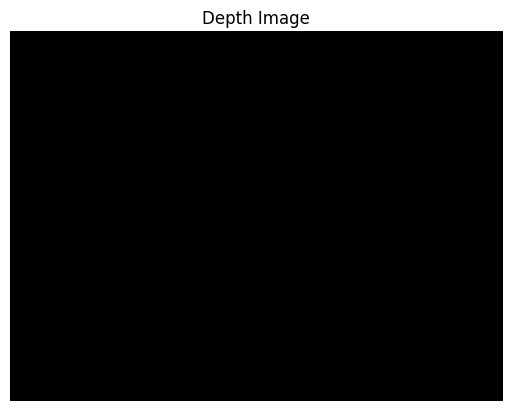

In [9]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

def generate_depth_image(stl_path, image_size=(640, 480), camera_distance=2.0, output_path="depth.png"):
    # Load the STL mesh
    mesh = o3d.io.read_triangle_mesh(stl_path)
    mesh.compute_vertex_normals()

    # Create a visualizer
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=False, width=image_size[0], height=image_size[1])
    vis.add_geometry(mesh)

    # Get and modify camera parameters
    ctr = vis.get_view_control()
    cam_params = ctr.convert_to_pinhole_camera_parameters()

    # Make a writable copy of the extrinsic matrix
    extrinsic = cam_params.extrinsic.copy()
    extrinsic[:3, 3] = [0, 0, camera_distance]  # Move camera away from object
    cam_params.extrinsic = extrinsic

    # Apply updated camera
    ctr.convert_from_pinhole_camera_parameters(cam_params)

    # Render and capture depth image
    vis.poll_events()
    vis.update_renderer()
    depth = vis.capture_depth_float_buffer(True)
    vis.destroy_window()

    # Convert to numpy array
    depth_np = np.asarray(depth)

    # Save and show depth image
    plt.imsave(output_path, depth_np, cmap='gray')
    print(f"✅ Depth image saved at: {output_path}")

    plt.imshow(depth_np, cmap='gray')
    plt.title("Depth Image")
    plt.axis('off')
    plt.show()

# Example usage
generate_depth_image(
    stl_path=r"resources\3D_object\stl\cube_op.stl",
    output_path="cube_depth.png"
)


In [10]:
import open3d as o3d
import numpy as np
import cv2

# === Load your 3D point cloud ===
pcd = o3d.io.read_point_cloud(r"resources\3D_object\ply\New\cube\cube_op_350.ply")

# === Define camera parameters (extrinsics, intrinsics) ===
# Example: use Open3D's PinholeCameraIntrinsic
width, height = 640, 480
fov = 60  # degrees
fx = fy = width / (2 * np.tan(np.deg2rad(fov / 2)))
cx, cy = width / 2, height / 2
intrinsics = o3d.camera.PinholeCameraIntrinsic(width, height, fx, fy, cx, cy)

# === Load real depth image (from your dataset) ===
depth_gt = cv2.imread(r"cube_depth.png", cv2.IMREAD_UNCHANGED).astype(np.float32)

# === Create Open3D renderer ===
vis = o3d.visualization.rendering.OffscreenRenderer(width, height)
material = o3d.visualization.rendering.MaterialRecord()
material.shader = "defaultUnlit"
vis.scene.add_geometry("object", pcd, material)

# Define camera pose (extrinsic)
R = o3d.geometry.get_rotation_matrix_from_xyz((0, 0, 0))
t = np.array([0, 0, 1])  # camera position
extrinsic = np.eye(4)
extrinsic[:3, :3] = R
extrinsic[:3, 3] = t

# === Render depth from the same viewpoint ===
depth_rendered = np.asarray(vis.render_to_depth_image(z_in_view_space=True))

# === Compute Chamfer distance between GT and rendered depth ===
# Convert depth images to 3D points using camera intrinsics
def depth_to_points(depth, fx, fy, cx, cy):
    h, w = depth.shape
    i, j = np.meshgrid(np.arange(w), np.arange(h))
    z = depth
    x = (i - cx) * z / fx
    y = (j - cy) * z / fy
    pts = np.stack((x, y, z), axis=-1)
    return pts[depth > 0]  # remove invalid points

pts_gt = depth_to_points(depth_gt, fx, fy, cx, cy)
pts_rendered = depth_to_points(depth_rendered, fx, fy, cx, cy)

# Chamfer distance
def chamfer_distance(p1, p2):
    pcd1 = o3d.geometry.KDTreeFlann(o3d.utility.Vector3dVector(p1))
    pcd2 = o3d.geometry.KDTreeFlann(o3d.utility.Vector3dVector(p2))

    d1 = []
    for x in p1:
        [_, idx, dist] = pcd2.search_knn_vector_3d(x, 1)
        d1.append(dist[0])
    d2 = []
    for x in p2:
        [_, idx, dist] = pcd1.search_knn_vector_3d(x, 1)
        d2.append(dist[0])
    return np.mean(d1) + np.mean(d2)

distance = chamfer_distance(pts_gt, pts_rendered)
reward = -distance  # reward = negative of Chamfer distance

print("Chamfer distance:", distance)
print("Reward:", reward)


RuntimeError: [Open3D Error] (__cdecl open3d::visualization::rendering::EngineInstance::EngineInstance(void)) D:\a\Open3D\Open3D\cpp\open3d\visualization\rendering\filament\FilamentEngine.cpp:104: EGL Headless is not supported on this platform.


In [11]:
import open3d as o3d
import numpy as np
import cv2

pcd = o3d.io.read_point_cloud(r"resources\3D_object\ply\New\cube\cube_op_350.ply")

width, height = 640, 480
fov = 60
fx = fy = width / (2 * np.tan(np.deg2rad(fov / 2)))
cx, cy = width / 2, height / 2

# Create visualizer window
vis = o3d.visualization.Visualizer()
vis.create_window(visible=True, width=width, height=height)
vis.add_geometry(pcd)

# Camera view setup
ctr = vis.get_view_control()
cam_params = ctr.convert_to_pinhole_camera_parameters()
cam_params.extrinsic = np.eye(4)
ctr.convert_from_pinhole_camera_parameters(cam_params)

# Capture depth image
vis.poll_events()
vis.update_renderer()
depth = vis.capture_depth_float_buffer(True)
depth_img = np.asarray(depth)

cv2.imwrite(r"cube_depth.png", (depth_img * 255).astype(np.uint8))
vis.destroy_window()


In [12]:
import open3d as o3d
import numpy as np
import cv2

# === Load 3D point cloud ===
pcd = o3d.io.read_point_cloud(r"resources\3D_object\ply\New\cube\cube_op_350.ply")

# === Parameters ===
width, height = 640, 480
fov = 60  # field of view in degrees
fx = fy = width / (2 * np.tan(np.deg2rad(fov / 2)))
cx, cy = width / 2, height / 2

# === Create Visualizer Window ===
vis = o3d.visualization.Visualizer()
vis.create_window(visible=True, width=width, height=height)
vis.add_geometry(pcd)

# Set a custom camera view (adjust as needed)
ctr = vis.get_view_control()
params = ctr.convert_to_pinhole_camera_parameters()
params.extrinsic = np.eye(4)  # camera at origin, looking toward -Z
ctr.convert_from_pinhole_camera_parameters(params)

# === Render and Capture Depth ===
vis.poll_events()
vis.update_renderer()
depth = vis.capture_depth_float_buffer(True)
depth_rendered = np.asarray(depth)

# Save rendered depth image for visualization
cv2.imwrite("rendered_depth.png", (depth_rendered * 255).astype(np.uint8))

vis.destroy_window()

# === Load Ground Truth Depth Image ===
depth_gt = cv2.imread(r"cube_depth.png", cv2.IMREAD_UNCHANGED).astype(np.float32)

# === Convert Depth Maps to 3D Point Clouds ===
def depth_to_points(depth, fx, fy, cx, cy):
    h, w = depth.shape
    i, j = np.meshgrid(np.arange(w), np.arange(h))
    z = depth
    x = (i - cx) * z / fx
    y = (j - cy) * z / fy
    pts = np.stack((x, y, z), axis=-1)
    return pts[depth > 0]  # remove invalid points

pts_gt = depth_to_points(depth_gt, fx, fy, cx, cy)
pts_rendered = depth_to_points(depth_rendered, fx, fy, cx, cy)

# === Compute Chamfer-like Distance ===
def chamfer_distance(p1, p2, num_samples=1000):
    p1 = p1[np.random.choice(len(p1), min(num_samples, len(p1)), replace=False)]
    p2 = p2[np.random.choice(len(p2), min(num_samples, len(p2)), replace=False)]

    pcd1 = o3d.geometry.KDTreeFlann(o3d.utility.Vector3dVector(p2))
    d1 = []
    for x in p1:
        [_, _, dist] = pcd1.search_knn_vector_3d(x, 1)
        d1.append(dist[0])
    return np.mean(d1)

distance = chamfer_distance(pts_gt, pts_rendered)
reward = -distance  # negative distance = higher reward for similarity

print(f"Chamfer distance: {distance:.6f}")
print(f"Reward: {reward:.6f}")


[Open3D WARNING] [KDTreeFlann::SetRawData] Failed due to no data.


RuntimeError: search_knn_vector_3d() error!

In [13]:
import open3d as o3d
import numpy as np
import cv2

# === Load 3D point cloud ===
pcd = o3d.io.read_point_cloud(r"resources\3D_object\ply\New\cube\cube_op_350.ply")

# === Parameters ===
width, height = 640, 480
fov = 60
fx = fy = width / (2 * np.tan(np.deg2rad(fov / 2)))
cx, cy = width / 2, height / 2

# === Create Visualizer Window ===
vis = o3d.visualization.Visualizer()
vis.create_window(visible=True, width=width, height=height)
vis.add_geometry(pcd)

# Set a simple camera pose
ctr = vis.get_view_control()
params = ctr.convert_to_pinhole_camera_parameters()
params.extrinsic = np.eye(4)
ctr.convert_from_pinhole_camera_parameters(params)

# === Render and Capture Depth ===
vis.poll_events()
vis.update_renderer()
depth = vis.capture_depth_float_buffer(True)
depth_rendered = np.asarray(depth)
vis.destroy_window()

# Save rendered depth image
cv2.imwrite("rendered_depth.png", (depth_rendered * 255).astype(np.uint8))

# === Load Ground Truth Depth Image ===
depth_gt = cv2.imread(r"cube_depth.png", cv2.IMREAD_UNCHANGED)
if depth_gt is None:
    raise FileNotFoundError("Ground truth depth image not found.")
depth_gt = depth_gt.astype(np.float32)

# === Convert Depth Maps to 3D Point Sets ===
def depth_to_points(depth, fx, fy, cx, cy):
    h, w = depth.shape
    i, j = np.meshgrid(np.arange(w), np.arange(h))
    z = depth
    x = (i - cx) * z / fx
    y = (j - cy) * z / fy
    pts = np.stack((x, y, z), axis=-1)
    pts = pts[np.isfinite(pts).all(axis=1)]
    return pts

pts_gt = depth_to_points(depth_gt, fx, fy, cx, cy)
pts_rendered = depth_to_points(depth_rendered, fx, fy, cx, cy)

if len(pts_gt) == 0 or len(pts_rendered) == 0:
    raise ValueError("One of the point sets is empty.")

# === Build KD-trees correctly ===
pcd_gt = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pts_gt))
pcd_rendered = o3d.geometry.PointCloud(o3d.utility.Vector3dVector(pts_rendered))
tree_gt = o3d.geometry.KDTreeFlann(pcd_gt)
tree_rendered = o3d.geometry.KDTreeFlann(pcd_rendered)

# === Chamfer Distance ===
def chamfer_distance(p1, tree2):
    dists = []
    for x in p1:
        ok, idx, dist = tree2.search_knn_vector_3d(x, 1)
        if ok > 0:
            dists.append(dist[0])
    return np.mean(dists) if len(dists) > 0 else np.inf

dist1 = chamfer_distance(pts_gt, tree_rendered)
dist2 = chamfer_distance(pts_rendered, tree_gt)
distance = dist1 + dist2
reward = -distance

print(f"Chamfer distance: {distance:.6f}")
print(f"Reward: {reward:.6f}")


IndexError: boolean index did not match indexed array along axis 1; size of axis is 640 but size of corresponding boolean axis is 3

ply to gif conversion

In [27]:
import numpy as np
import pyvista as pv

def ply_to_gif(ply_path, gif_path, n_frames=100, image_scale=1):
    # Load the .ply mesh
    mesh = pv.read(ply_path)

    # Setup the plotter with off_screen rendering
    plotter = pv.Plotter(off_screen=True, window_size=[400*image_scale, 400*image_scale])
    plotter.add_mesh(mesh, smooth_shading=True)
    plotter.set_background("white")

    # Generate an orbital path around the mesh
    path = plotter.generate_orbital_path(n_points=n_frames, shift=1.5*mesh.length)

    # Start generating the gif
    plotter.open_gif(gif_path)

    # Orbit on the path and write frames to gif file
    plotter.orbit_on_path(path)

    plotter.close()

# Example usage
ply_file = r"resources\3D_object\ply\gt_updated.ply"   # Path to your .ply file
gif_file = r"resources\3D_object\output.gif"       # Output gif file path
ply_to_gif(ply_file, gif_file)


In [25]:
import os
print(os.getcwd())


d:\OmkarTupe\RARL
